### Import your librares

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


### Load your dataset

In [4]:
df = pd.read_csv('seattle_weather.csv')
df

,DATE,PRCP,TMAX,TMIN,RAIN
0,1948-01-01,0.47,51,42,True
1,1948-01-02,0.59,45,36,True
2,1948-01-03,0.42,45,35,True
3,1948-01-04,0.31,45,34,True
4,1948-01-05,0.17,45,32,True
...,...,...,...,...,...
25546,2017-12-10,0.00,49,34,False
25547,2017-12-11,0.00,49,29,False
25548,2017-12-12,0.00,46,32,False
25549,2017-12-13,0.00,48,34,False


### Handle missing data in PRCP and RAIN columns

In [5]:
df['RAIN'].var()

0.24462904154362605

In [6]:
df['PRCP'].var()

0.05713603840671194

In [7]:
df['RAIN'] = df['RAIN'].fillna(method="ffill")
df['PRCP']=df['PRCP'].fillna(method='ffill')

df.info()
# convert the float to int 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    25551 non-null  object 
 1   PRCP    25551 non-null  float64
 2   TMAX    25551 non-null  int64  
 3   TMIN    25551 non-null  int64  
 4   RAIN    25551 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 823.5+ KB


### Repeat the following steps for each column within outliers

* Visualize the outliers
* Detect if your data set contains any outliers
* Identify lower & higher limit of outliers
* Drop all outliers
* Visualize the column after processing


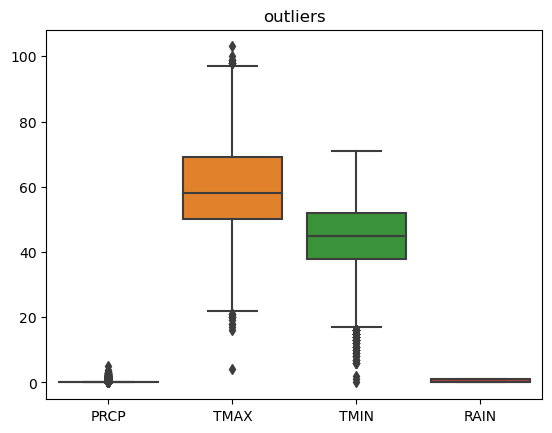

In [9]:
sns.boxplot(df)
plt.title('outliers')
plt.show()

In [10]:
def findOutliers(colume):
    Q1 = np.percentile(df['{}'.format(colume)], 25, interpolation = 'midpoint')
    Q3 = np.percentile(df['{}'.format(colume)], 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    higher_bound = Q3 + 1.5*(IQR)    
    lower_bound = Q1 - 1.5*(IQR)
    print('lower bound outliers ', Q1 - 1.5*(IQR))
    print('higher bound outliers', Q3 + 1.5*(IQR))
    return higher_bound ,lower_bound



In [11]:
def drop_outliers(max,min,name,DF):
    DF = DF.drop(DF[(DF['{}'.format(name)] > max) | (DF['{}'.format(name)] < min)].index)
    return DF
    

In [12]:
TMAX_High,TMAX_Min = findOutliers('TMAX')
DF = drop_outliers(TMAX_High,TMAX_Min,'TMAX',df)
TMIN_High,TMIN_Min =  findOutliers('TMIN')
DF = drop_outliers(TMIN_High,TMIN_Min,'TMIN',df)
PRCP_High,PRCP_Min=findOutliers('PRCP')
DF = drop_outliers(PRCP_High,PRCP_Min,'PRCP',df)

lower bound outliers  21.5
higher bound outliers 97.5
lower bound outliers  17.0
higher bound outliers 73.0
lower bound outliers  -0.15000000000000002
higher bound outliers 0.25


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12464\992383312.py:2: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(df['{}'.format(colume)], 25, interpolation = 'midpoint')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12464\992383312.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(df['{}'.format(colume)], 75, interpolation = 'midpoint')


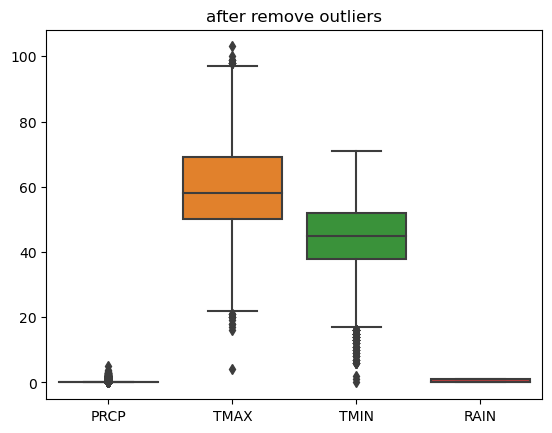

In [13]:
# Remove outliers from TMAX
sns.boxplot(df)
plt.title('after remove outliers')
plt.show()
